In [1]:
import matplotlib.pyplot as plt
plt.close('all')
%matplotlib inline

import pandas as pd
import numpy as np

import src.randgg
from src.randgg.algorithm import compute_closest_intersections,compute_regressions,print_best_p,compute_best_p
from src.randgg.plot import plot_curve, plot_regressions

In [2]:
nb_samples = 10000

In [3]:
df = pd.read_csv("connected_undirected_%d.csv" % (nb_samples),sep=',')
df['p'] = df['p'].apply(lambda x : float(x.replace(',','.'))).values
df.head()

,p,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
0,0.001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 432x288 with 0 Axes>

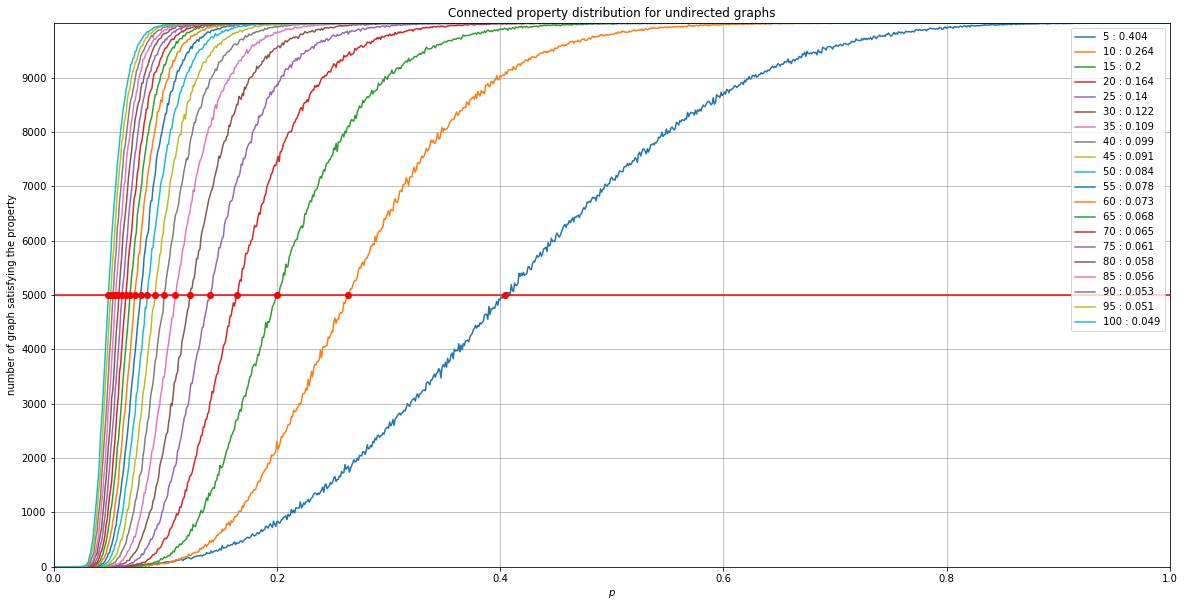

In [5]:
plot_curve(df,nb_samples,'Connected property distribution for undirected graphs')

In [6]:
print_best_p(df,nb_samples,16)

Best p for 5 vertices : 0.404431, regression error : 28.685148
Best p for 10 vertices : 0.263928, regression error : 22.965534
Best p for 15 vertices : 0.200462, regression error : 23.028593
Best p for 20 vertices : 0.164257, regression error : 33.572569
Best p for 25 vertices : 0.140369, regression error : 41.101136
Best p for 30 vertices : 0.123604, regression error : 66.216854
Best p for 35 vertices : 0.110482, regression error : 98.908741
Best p for 40 vertices : 0.099853, regression error : 116.209044
Best p for 45 vertices : 0.091134, regression error : 122.712549
Best p for 50 vertices : 0.084253, regression error : 122.212480
Best p for 55 vertices : 0.078589, regression error : 128.606648
Best p for 60 vertices : 0.073886, regression error : 143.897441
Best p for 65 vertices : 0.069721, regression error : 160.452471
Best p for 70 vertices : 0.065984, regression error : 183.805445
Best p for 75 vertices : 0.062641, regression error : 201.935480
Best p for 80 vertices : 0.059465

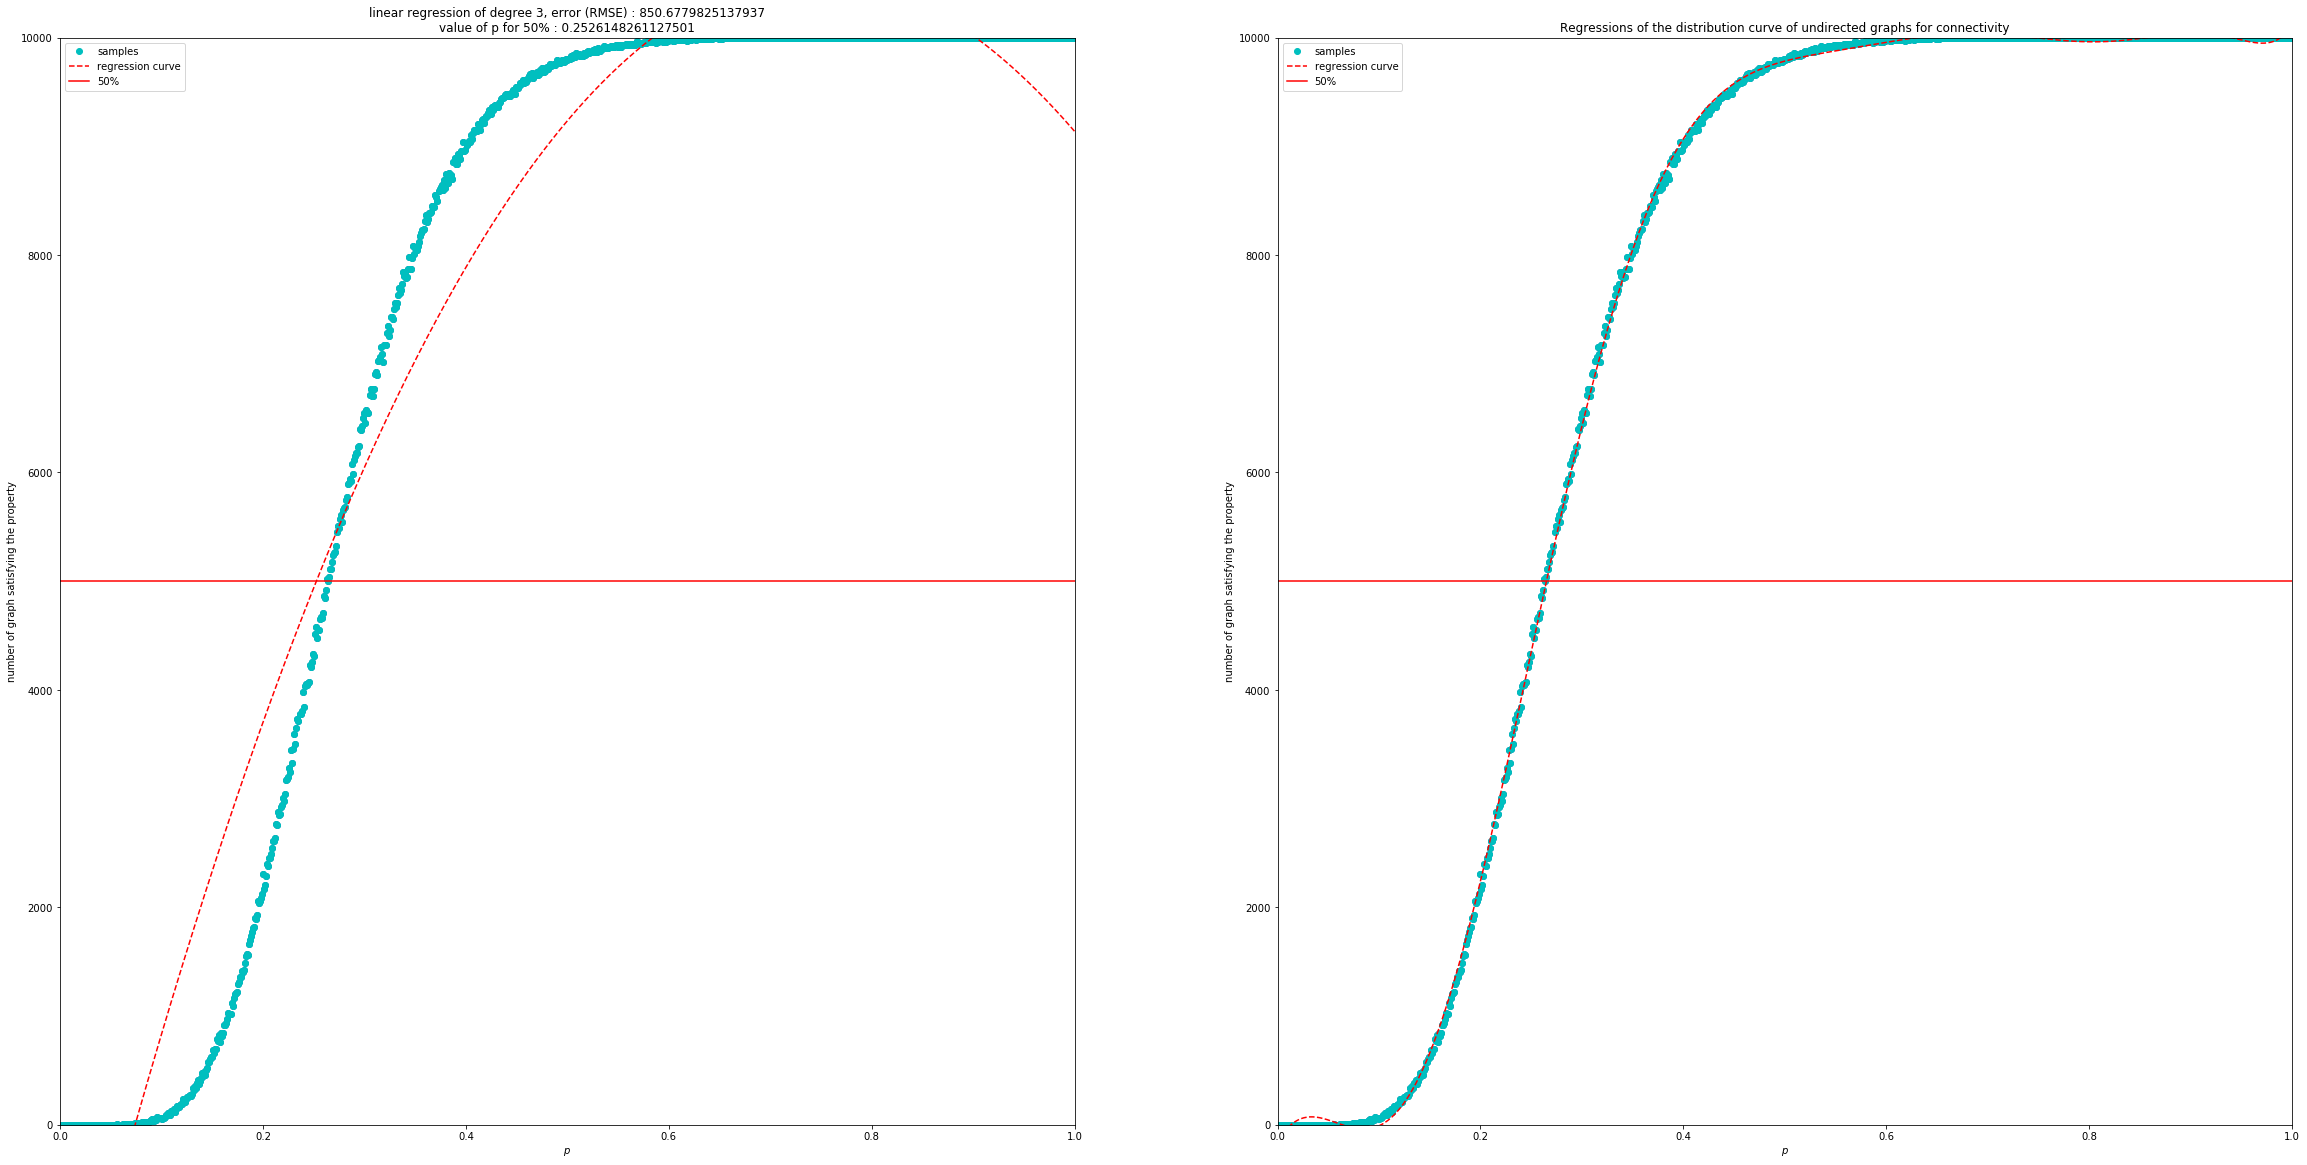

In [7]:
plot_regressions(df,'10',nb_samples,'Regressions of the distribution curve of undirected graphs for connectivity',
                 min_degree=3,
                 max_degree=10,
                 step_degree=7,
                 subplot=(1,2),
                 savefile="./poly_interpolation_order_10_connected_undirected.pdf"
                )

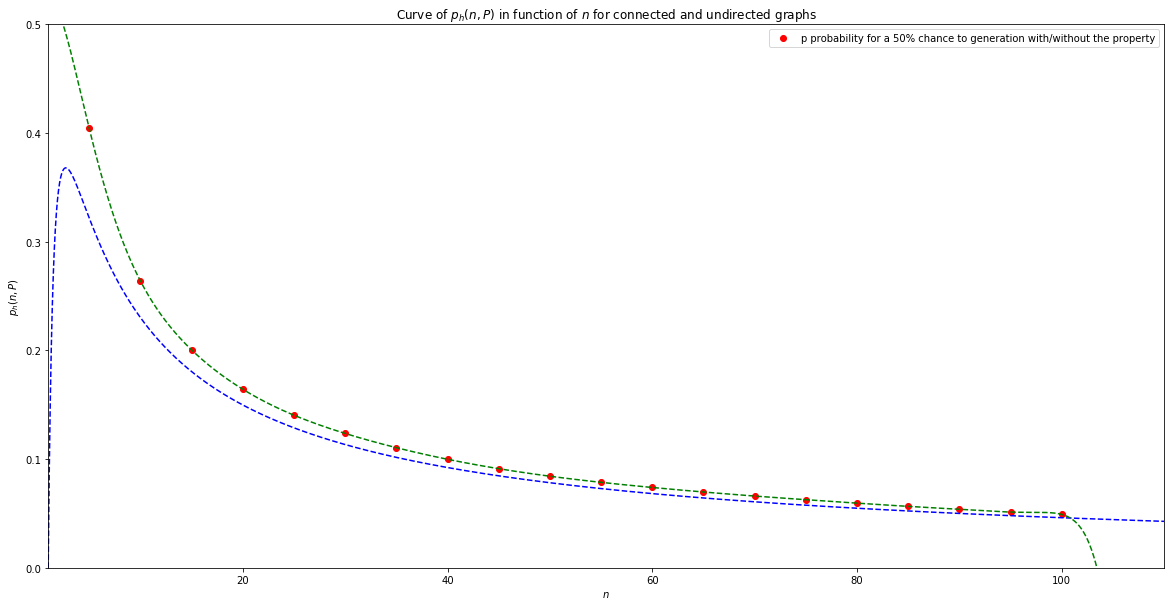

In [8]:
best_ps = compute_best_p(df,nb_samples,16)
x = np.array(list(map(lambda x : float(x[0]), list(best_ps.items()))))
y = np.array(list(map(lambda x : x[1][1][3],list(best_ps.items()))))

m = df.shape[0]
fit = np.polyfit(x,y,16)
fit_fn = np.poly1d(fit)
y_pred = fit_fn(x)
mse = np.sum((y_pred - y) ** 2)
rmse = np.sqrt(mse / m)

plt.figure(figsize=(20,10))
plt.xlim((1,110))
plt.ylim((0.0,0.5))

# plot regression points from sample
plt.plot(x,y,'ro')

# plot ln(x)/x
t = np.arange(1., 200., 0.1)
plt.plot(t,np.log(t) / t,'--b')

# plot regression curve
t = np.arange(1.,200.,0.1)
plt.plot(t,fit_fn(t),'--g')

plt.legend(['p probability for a 50% chance to generation with/without the property'])
plt.title('Curve of $p_h(n,P)$ in function of $n$ for connected and undirected graphs')
plt.ylabel('$p_h(n,P)$')
plt.xlabel('$n$')
plt.savefig("./phnp_connected_undirected.pdf",bbox_inches = 'tight')
plt.show()

In [9]:
print(type(fit_fn.coefficients))
print(fit_fn.coefficients)

acc = "List("
for itr in range(len(fit_fn.coefficients) - 1) :
    acc = acc + str(fit_fn.coefficients[itr]) + ","
acc = acc + str(fit_fn.coefficients[len(fit_fn.coefficients) - 1])
acc = acc + ")"
print(acc)

acc = "poly = ["
for itr in range(len(fit_fn.coefficients) - 1) :
    acc = acc + '"' + str(fit_fn.coefficients[itr]) + '"' + ","
    if(itr % 4 == 3):
        acc = acc + "\n"
acc = acc + '"' + str(fit_fn.coefficients[len(fit_fn.coefficients) - 1]) + '"'
acc = acc + "]"
print(acc)

<class 'numpy.ndarray'>
[-5.04603899e-27  4.31993692e-24 -1.69560017e-21  4.04360969e-19
 -6.54505061e-17  7.60735048e-15 -6.55053972e-13  4.24887517e-11
 -2.08967327e-09  7.77897141e-08 -2.16984393e-06  4.44497255e-05
 -6.45777665e-04  6.24801199e-03 -3.50145656e-02  6.04776837e-02
  4.89676438e-01]
List(-5.046038991374645e-27,4.3199369225834404e-24,-1.6956001658722524e-21,4.0436096879112003e-19,-6.545050608321061e-17,7.607350480117121e-15,-6.550539720095631e-13,4.2488751655390925e-11,-2.089673273557766e-09,7.77897140686816e-08,-2.169843930833028e-06,4.4449725510668524e-05,-0.000645777665256876,0.006248011993559253,-0.035014565619050204,0.060477683662930375,0.4896764378172495)
poly = ["-5.046038991374645e-27","4.3199369225834404e-24","-1.6956001658722524e-21","4.0436096879112003e-19",
"-6.545050608321061e-17","7.607350480117121e-15","-6.550539720095631e-13","4.2488751655390925e-11",
"-2.089673273557766e-09","7.77897140686816e-08","-2.169843930833028e-06","4.4449725510668524e-05",
"-0.